In [2]:
import scipy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import nibabel as nib

from skimage.filters import gaussian
from skimage import exposure
from skimage.transform import rotate, resize
from skimage.restoration import inpaint
from skimage.util import random_noise

import scipy.ndimage as ndi




In [2]:
import nibabel as nib

# Load the NIfTI image
file_path = r"atlas-train-dataset-1.0.1\atlas-train-dataset-1.0.1\train\imagesTr\im0.nii.gz"
nii_image = nib.load(file_path)

# Get the shape of the data
data_shape = nii_image.shape

# Print the number of slices (assuming slices are along the third dimension)
num_slices = data_shape[-1]
print(f"Number of slices in the NIfTI file: {num_slices}")


FileNotFoundError: No such file or no access: 'atlas-train-dataset-1.0.1/atlas-train-dataset-1.0.1/train/imagesTr/im0.nii.gz'

No .nii files found in the specified folder.


In [3]:
import os
import nibabel as nib

def count_slices_in_folder(folder_path):
    """
    Reads the number of slices in all .nii.gz images in the folder.

    Parameters:
        folder_path (str): Path to the folder containing .nii.gz files.

    Returns:
        dict: A dictionary with file names as keys and the number of slices as values.
    """
    # List all .nii.gz files in the folder
    nii_files = [f for f in os.listdir(folder_path) if f.endswith('.nii.gz')]
    
    # Check if there are any .nii.gz files
    if len(nii_files) == 0:
        raise ValueError("No .nii.gz files found in the specified folder.")
    
    # Dictionary to store slices count
    slices_count = {}
    
    for nii_file in nii_files:
        file_path = os.path.join(folder_path, nii_file)
        
        try:
            # Load the NIfTI file
            nii_image = nib.load(file_path)
            
            # Get the number of slices (assumed along the third dimension)
            num_slices = nii_image.shape[-1]
            
            # Store in the dictionary
            slices_count[nii_file] = num_slices
        
        except Exception as e:
            print(f"Error reading file {nii_file}: {e}")
    
    return slices_count

# Example usage
folder_path = r"C:\Users\rajwn\Videos\monai_ML_project\Atlas\atlas-train-dataset-1.0.1\atlas-train-dataset-1.0.1\train\imagesTr"
try:
    slices_info = count_slices_in_folder(folder_path)
    print("Slices count for each file:")
    for file, count in slices_info.items():
        print(f"{file}: {count} slices")
except ValueError as e:
    print(e)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\rajwn\\Videos\\monai_ML_project\\Atlas\\atlas-train-dataset-1.0.1\\atlas-train-dataset-1.0.1\\train\\imagesTr'

In [4]:
import os
import nibabel as nib

def average_slices_in_folder(folder_path):
    """
    Calculates the average number of slices in all .nii.gz images in the folder.

    Parameters:
        folder_path (str): Path to the folder containing .nii.gz files.

    Returns:
        float: The average number of slices.
    """
    # List all .nii.gz files in the folder
    nii_files = [f for f in os.listdir(folder_path) if f.endswith('.nii.gz')]
    
    # Check if there are any .nii.gz files
    if len(nii_files) == 0:
        raise ValueError("No .nii.gz files found in the specified folder.")
    
    # Initialize total slices count
    total_slices = 0
    
    for nii_file in nii_files:
        file_path = os.path.join(folder_path, nii_file)
        
        try:
            # Load the NIfTI file
            nii_image = nib.load(file_path)
            
            # Get the number of slices (assumed along the third dimension)
            num_slices = nii_image.shape[-1]
            
            # Add to the total slices count
            total_slices += num_slices
        
        except Exception as e:
            print(f"Error reading file {nii_file}: {e}")
    
    # Calculate the average
    average_slices = total_slices / len(nii_files)
    return average_slices

# Example usage
folder_path = r"C:\Users\rajwn\Videos\monai_ML_project\Atlas\atlas-train-dataset-1.0.1\atlas-train-dataset-1.0.1\train\imagesTr"
try:
    avg_slices = average_slices_in_folder(folder_path)
    print(f"Average number of slices across all .nii.gz files: {avg_slices:.2f}")
except ValueError as e:
    print(e)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\rajwn\\Videos\\monai_ML_project\\Atlas\\atlas-train-dataset-1.0.1\\atlas-train-dataset-1.0.1\\train\\imagesTr'

# Empty File

In [6]:
#input_nifty_file_path = r"C:\Users\rajwn\Videos\monai_ML_project\Atlas\atlas-train-dataset-1.0.1\atlas-train-dataset-1.0.1\train\TrainSegmentation/*"
input_nifty_file_path = r"..\atlas-train-dataset-1.0.1\atlas-train-dataset-1.0.1\train\TrainSegmentation/*"
list_labels = glob.glob(input_nifty_file_path)

In [5]:
for patient in list_labels:
    nifty_file = nib.load(patient)
    fdata = nifty_file.get_fdata()
    np_unique = np.unique(fdata)
    if len(np_unique) == 1:
        print(patient)

In [5]:
nifty_file = r"C:\Users\rajwn\Videos\monai_ML_project\Atlas\atlas-train-dataset-1.0.1\atlas-train-dataset-1.0.1\train\labelsTr\*"

In [6]:
list_labels = glob.glob(nifty_file)

In [7]:
for patient in list_labels:


    niff = nib.load(patient)
    fniff = niff.get_fdata()
    unique_fniff = np.unique(fniff)
    if len(unique_fniff) == 1:
        print(patient)


In [1]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3060 Laptop GPU
Using device: cuda


In [ ]:
import monai
import os
from glob import glob
import numpy as np 
import torch
import matplotlib.pyplot as plt
from monai.transforms import (
    Compose,
    LoadImaged,
    ToTensord, 
    EnsureChannelFirstd,
    Spacingd,
    ScaleIntensityRanged,
    Orientationd,
   
    CropForegroundd,
    
)

from monai.data import Dataset,DataLoader,CacheDataset
from monai.utils import set_determinism, first



import matplotlib.pyplot as plt

In [4]:
in_dir = r"C:\Users\rajwn\Videos\monai_ML_project\Atlas\atlas-train-dataset-1.0.1\atlas-train-dataset-1.0.1\train"

In [ ]:
import os
from glob import glob
#import shutil
from tqdm import tqdm
#import dicom2nifti
#import numpy as np
#import nibabel as nib
from monai.transforms import (
    Compose,
    EnsureChannelFirstD,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,

)
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism


def prepare(in_dir, pixdim=(1.5, 1.5, 1.0), a_min=-200, a_max=200, spatial_size=[128, 128, 64], cache=True):
    """
    This function is for preprocessing, it contains only the basic transforms, but you can add more operations that you
    find in the Monai documentation.
    https://monai.io/docs.html
    """

    set_determinism(seed=0)

    path_train_volumes = sorted(glob(os.path.join(in_dir, "TrainVolumes", "*.nii.gz")))
    path_train_segmentation = sorted(glob(os.path.join(in_dir, "TrainSegmentation", "*.nii.gz")))

    path_test_volumes = sorted(glob(os.path.join(in_dir, "TestVolumes", "*.nii.gz")))
    path_test_segmentation = sorted(glob(os.path.join(in_dir, "TestSegmentation", "*.nii.gz")))

    train_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in
                   zip(path_train_volumes, path_train_segmentation)]
    test_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in
                  zip(path_test_volumes, path_test_segmentation)]

    train_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstD(keys=["vol", "seg"]),
            Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True),
            CropForegroundd(keys=["vol", "seg"], source_key="vol"),
            Resized(keys=["vol", "seg"], spatial_size=spatial_size),
            ToTensord(keys=["vol", "seg"]),

        ]
    )

    test_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstD(keys=["vol", "seg"]),
            Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True),
            CropForegroundd(keys=['vol', 'seg'], source_key='vol'),
            Resized(keys=["vol", "seg"], spatial_size=spatial_size),
            ToTensord(keys=["vol", "seg"]),

        ]
    )

    if cache:
        train_ds = CacheDataset(data=train_files, transform=train_transforms, cache_rate=1.0)
        train_loader = DataLoader(train_ds, batch_size=1)

        test_ds = CacheDataset(data=test_files, transform=test_transforms, cache_rate=1.0)
        test_loader = DataLoader(test_ds, batch_size=1)

        return train_loader, test_loader

    else:
        train_ds = Dataset(data=train_files, transform=train_transforms)
        train_loader = DataLoader(train_ds, batch_size=1)

        test_ds = Dataset(data=test_files, transform=test_transforms)
        test_loader = DataLoader(test_ds, batch_size=1)

        return train_loader, test_loader

In [6]:
import tqdm

In [ ]:
def show_patient(data, SLICE_NUMBER=1, train=True, test=False):
    """
    This function is to show one patient from your datasets, so that you can si if the it is okay or you need 
    to change/delete something.

    `data`: this parameter should take the patients from the data loader, which means you need to can the function
    prepare first and apply the transforms that you want after that pass it to this function so that you visualize 
    the patient with the transforms that you want.
    `SLICE_NUMBER`: this parameter will take the slice number that you want to display/show
    `train`: this parameter is to say that you want to display a patient from the training data (by default it is true)
    `test`: this parameter is to say that you want to display a patient from the testing patients.
    """

    check_patient_train, check_patient_test = data

    view_train_patient = first(check_patient_train)
    view_test_patient = first(check_patient_test)

    
    if train:
        plt.figure("Visualization Train", (12, 6))
        plt.subplot(1, 2, 1)
        plt.title(f"vol {SLICE_NUMBER}")
        plt.imshow(view_train_patient["vol"][0, 0, :, :, SLICE_NUMBER], cmap="gray")

        plt.subplot(1, 2, 2)
        plt.title(f"seg {SLICE_NUMBER}")
        plt.imshow(view_train_patient["seg"][0, 0, :, :, SLICE_NUMBER])
        plt.show()
    
    if test:
        plt.figure("Visualization Test", (12, 6))
        plt.subplot(1, 2, 1)
        plt.title(f"vol {SLICE_NUMBER}")
        plt.imshow(view_test_patient["vol"][0, 0, :, :, SLICE_NUMBER], cmap="gray")

        plt.subplot(1, 2, 2)
        plt.title(f"seg {SLICE_NUMBER}")
        plt.imshow(view_test_patient["seg"][0, 0, :, :, SLICE_NUMBER])
        plt.show()


def calculate_pixels(data):
    val = np.zeros((1, 2))

    for batch in tqdm(data):
        batch_label = batch["seg"] != 0
        _, count = np.unique(batch_label, return_counts=True)

        if len(count) == 1:
            count = np.append(count, 0)
        val += count

    print('The last values:', val)
    return val

: 

c:\Users\rajwn\Videos\monai_ML_project\Atlas\venv\Lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)
Loading dataset: 100%|██████████| 9/9 [00:24<00:00,  2.76s/it]


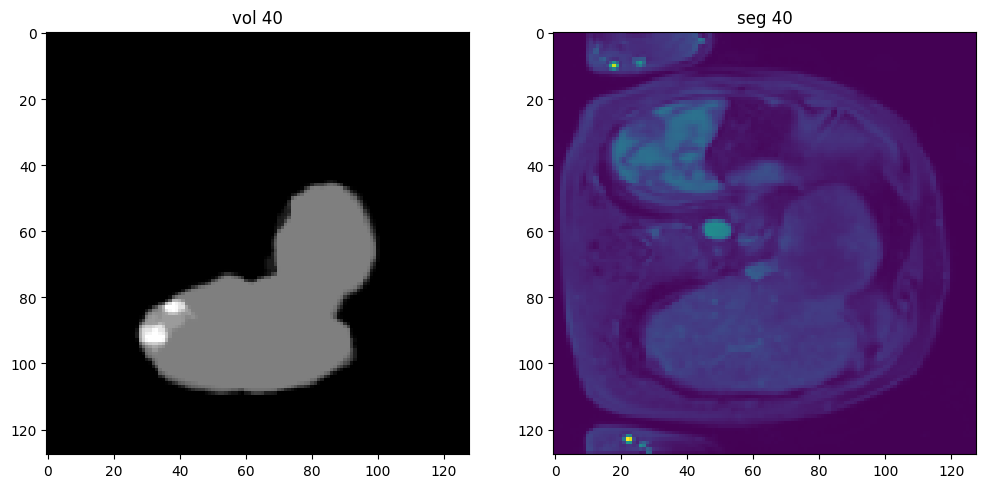

In [15]:
patient = prepare(in_dir)
show_patient(patient, 40)